In [4]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from util_koyak import col_selector, grid_estimator

/home/pnietoramos/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
df_genre = pd.read_csv("features_genre_6.csv", index_col=0)
df_genre.head()

,"('chroma_cens', 'kurtosis', '01')","('chroma_cens', 'kurtosis', '02')","('chroma_cens', 'kurtosis', '03')","('chroma_cens', 'kurtosis', '04')","('chroma_cens', 'kurtosis', '05')","('chroma_cens', 'kurtosis', '06')","('chroma_cens', 'kurtosis', '07')","('chroma_cens', 'kurtosis', '08')","('chroma_cens', 'kurtosis', '09')","('chroma_cens', 'kurtosis', '10')",...,"('tonnetz', 'std', '05')","('tonnetz', 'std', '06')","('zcr', 'kurtosis', '01')","('zcr', 'max', '01')","('zcr', 'mean', '01')","('zcr', 'median', '01')","('zcr', 'min', '01')","('zcr', 'skew', '01')","('zcr', 'std', '01')",genre_top
track_id,,,,,,,,,,,,,,,,,,,,,
2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,...,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.0,2.089872,0.061448,Hip-Hop
3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,0.619185,...,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.0,1.716724,0.069330,Hip-Hop
5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,...,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.0,2.193303,0.044861,Hip-Hop
10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,...,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.0,3.542325,0.040800,Pop
134,0.918445,0.674147,0.577818,1.281117,0.933746,0.078177,1.199204,-0.175223,0.925482,1.438509,...,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.0,1.806106,0.054623,Hip-Hop


In [7]:
df_genre["genre_top"].shape

(42849,)

In [3]:
df_mfcc_cont = col_selector(['mfcc','contrast'], df_genre)

In [4]:
df_mfcc_cont.head()

,"('mfcc', 'kurtosis', '01')","('mfcc', 'kurtosis', '02')","('mfcc', 'kurtosis', '03')","('mfcc', 'kurtosis', '04')","('mfcc', 'kurtosis', '05')","('mfcc', 'kurtosis', '06')","('mfcc', 'kurtosis', '07')","('mfcc', 'kurtosis', '08')","('mfcc', 'kurtosis', '09')","('mfcc', 'kurtosis', '10')",...,"('spectral_contrast', 'skew', '06')","('spectral_contrast', 'skew', '07')","('spectral_contrast', 'std', '01')","('spectral_contrast', 'std', '02')","('spectral_contrast', 'std', '03')","('spectral_contrast', 'std', '04')","('spectral_contrast', 'std', '05')","('spectral_contrast', 'std', '06')","('spectral_contrast', 'std', '07')",genre_top
track_id,,,,,,,,,,,,,,,,,,,,,
2,3.856789,1.541901,0.000816,0.330728,0.118731,-0.342687,-0.259252,0.146735,0.410656,-0.162872,...,1.690805,-1.571900,4.541557,4.321756,3.936234,3.144537,3.310087,3.096597,7.622641,Hip-Hop
3,4.296755,1.399977,0.112535,-0.211170,0.032953,-0.023489,0.150404,0.046454,0.033484,-0.064596,...,0.391984,-1.461130,4.430571,4.517010,4.631938,3.747272,4.085845,3.351878,7.611158,Hip-Hop
5,2.624517,2.415293,0.440233,-0.782131,-0.771069,-0.724216,0.090260,0.152119,0.261731,-0.608905,...,0.366885,-1.271206,4.942019,4.376371,4.262785,3.190465,3.102941,3.087401,8.494939,Hip-Hop
10,5.076893,1.161854,2.095651,1.372743,-0.203574,-0.345354,-0.529139,0.561974,0.281350,-0.150672,...,1.257145,-0.592026,5.561779,4.008956,3.690036,2.646124,3.457347,4.693093,8.396724,Pop
134,1.559808,0.840775,-0.171289,-0.265671,-0.279361,0.190866,-0.192000,0.422766,0.044087,-0.003510,...,0.683411,-0.736473,4.736264,4.715623,4.440975,3.465022,3.858569,3.905518,8.469674,Hip-Hop


In [5]:
X = df_mfcc_cont.drop("genre_top",axis=1)
y = df_mfcc_cont["genre_top"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10,stratify=y, random_state=4444)

In [7]:
sca = StandardScaler()
X_train_sca = sca.fit_transform(X_train)
X_test_sca = sca.transform(X_test);

In [8]:
param_grid = {}
grid_estimator(LogisticRegression(), param_grid, X_train_sca, y_train, X_test_sca, y_test)

Accuracy training: 0.6647391349445079
Accuracy test: 0.6842473745624271
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


### Hyperparameter Tunning

In [10]:
np.logspace(-2,1,6)

array([ 0.01      ,  0.03981072,  0.15848932,  0.63095734,  2.51188643,
       10.        ])

In [12]:
param_grid = {'C': np.logspace(-2,1,6), 'penalty' : ['l1', 'l2']}
grid_estimator(LogisticRegression(), param_grid, X_train_sca, y_train, X_test_sca, y_test)

Accuracy training: 0.6651021678249144
Accuracy test: 0.6835472578763128
LogisticRegression(C=2.5118864315095797, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [13]:
np.arange(1.5, 3.6,1)

array([1.5, 2.5, 3.5])

In [14]:
param_grid = {'C': np.arange(1.5, 3.6,1), 'penalty' : ['l1']}
grid_estimator(LogisticRegression(), param_grid, X_train_sca, y_train, X_test_sca, y_test)

Accuracy training: 0.665179960585
Accuracy test: 0.683547257876
LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [9]:
param_grid = {'C': np.arange(0.5, 2.4, 0.1), 'penalty' : ['l1']}
grid_estimator(LogisticRegression(), param_grid, X_train_sca, y_train, X_test_sca, y_test, n_jobs=2)

Accuracy training: 0.665361477025
Accuracy test: 0.683080513419
LogisticRegression(C=1.7999999999999998, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


### Printing best result

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
%matplotlib inline

In [10]:
def conf_plot(y, y_pred):
    plt.figure(dpi=180)
    sns.heatmap(confusion_matrix(y, y_pred), cmap=plt.cm.Blues, annot=True, square=True, fmt='d', annot_kws={"size": 15});
    plt.xlabel('prediction')
    plt.ylabel('actual');

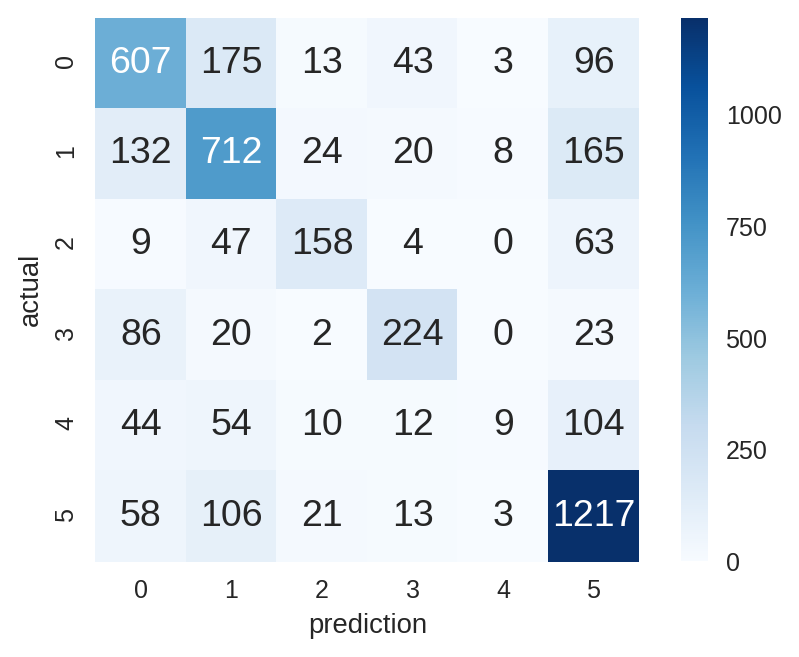

In [11]:
LR = LogisticRegression(C=1.8, penalty='l1')
LR.fit(X_train_sca, y_train)
y_pred = LR.predict(X_test_sca)
conf_plot(y_test, y_pred)

### Trying with SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X_train_sca,y_train)

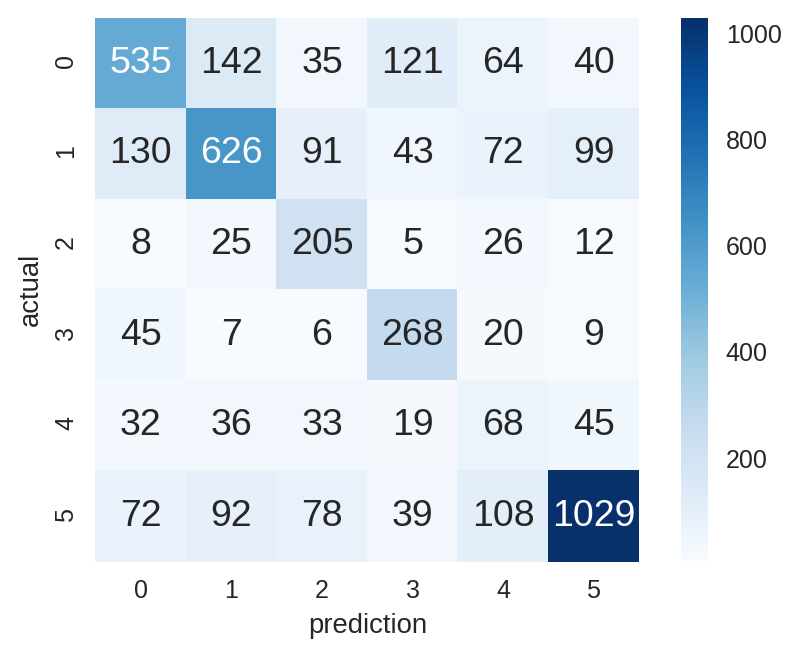

In [15]:
LR = LogisticRegression(C=1.8, penalty='l1')
LR.fit(X_smoted, y_smoted)
y_pred = LR.predict(X_test_sca)
conf_plot(y_test, y_pred)

In [16]:
accuracy_score(y_test, y_pred)

0.6373395565927654

In [18]:
accuracy_score(y_smoted, LR.predict(X_smoted))

0.6456439987464745